In [126]:
import h5py
import numpy as np
import pickle

In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
path = "F:\\Uni\\Masterarbeit\\Daten\\CollectedData\\T007"

AOA = pickle.load(open(os.path.join(path, "AOA_mat.p"), "rb"))
DVS = pickle.load(open(os.path.join(path, "dv_list.p"), "rb"))
MA = pickle.load(open(os.path.join(path, "Ma_mat.p"), "rb"))
AOA = AOA[:2239]
DVS = DVS[:2239]
MA = MA[:2239]

In [129]:
from ActiveSubspaceMethod import *

In [130]:
asm = ASM()
dsn_names, CL, CD, CMz, RMS_Rho, d_CD = asm.load_h5_data("T007.h5")

)>
DSN_1871 <HDF5 group "/DESIGNS/DSN_1871" (3 members)>
DSN_1872 <HDF5 group "/DESIGNS/DSN_1872" (3 members)>
DSN_1873 <HDF5 group "/DESIGNS/DSN_1873" (3 members)>
DSN_1874 <HDF5 group "/DESIGNS/DSN_1874" (3 members)>
DSN_1875 <HDF5 group "/DESIGNS/DSN_1875" (3 members)>
DSN_1876 <HDF5 group "/DESIGNS/DSN_1876" (3 members)>
DSN_1877 <HDF5 group "/DESIGNS/DSN_1877" (3 members)>
DSN_1878 <HDF5 group "/DESIGNS/DSN_1878" (3 members)>
DSN_1879 <HDF5 group "/DESIGNS/DSN_1879" (3 members)>
DSN_1880 <HDF5 group "/DESIGNS/DSN_1880" (3 members)>
DSN_1881 <HDF5 group "/DESIGNS/DSN_1881" (3 members)>
DSN_1882 <HDF5 group "/DESIGNS/DSN_1882" (3 members)>
DSN_1883 <HDF5 group "/DESIGNS/DSN_1883" (3 members)>
DSN_1884 <HDF5 group "/DESIGNS/DSN_1884" (3 members)>
DSN_1885 <HDF5 group "/DESIGNS/DSN_1885" (3 members)>
DSN_1886 <HDF5 group "/DESIGNS/DSN_1886" (3 members)>
DSN_1887 <HDF5 group "/DESIGNS/DSN_1887" (3 members)>
DSN_1888 <HDF5 group "/DESIGNS/DSN_1888" (3 members)>
DSN_1889 <HDF5 group "/DE

In [131]:
asm.calculate_subspace(d_CD, rank=5)

 c:\Users\Nils\Workspace\MA_git\MA\ActiveSubspaceMethod.py:100: ComplexWarning:Casting complex values to real discards the imaginary part


plot


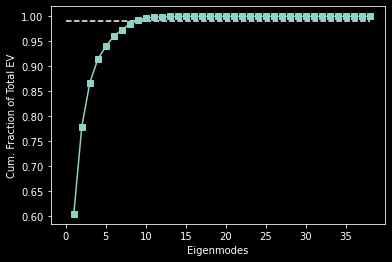

In [132]:
asm.plot_eigenmodes()

In [133]:
x = np.hstack((np.array(DVS) @ asm.components_.T, AOA.reshape(-1,1), MA.reshape(-1,1)))
y = np.array(CD).reshape(-1,1)


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [136]:
asm.fit_gp(train_x, train_y)

gpy


In [137]:
asm.gpy_model.log_likelihood()

3315.444467290228

In [138]:
asm.gpy_model.parameters, asm.gpy_model.kern.parameters

([<GPy.kern.src.rbf.RBF at 0x27e92160e50>,
 [GP_regression.rbf.variance:
  Param([0.15542979]),
  GP_regression.rbf.lengthscale:
  Param([ 1.00001396,  0.99968416,  0.99952041,  0.99825207,  1.00002883,
         20.55218929,  0.0376664 ])])

In [139]:
pred_y, pred_y_var = asm.gpy_model.predict(test_x)

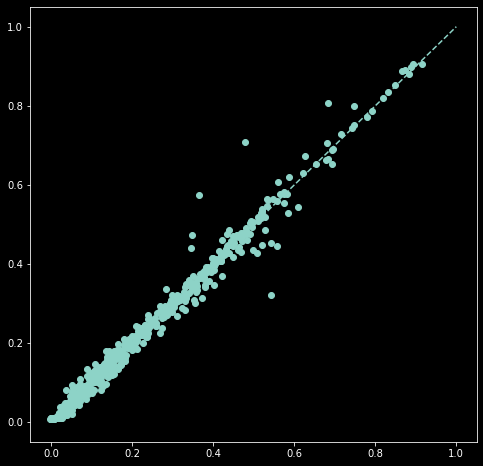

In [140]:
plt.figure(figsize=(8,8))
plt.scatter(pred_y, test_y)
plt.plot([0, 1], [0, 1], "--")

In [144]:
xnew = test_x[0,:].reshape(1,-1)

In [145]:
asm.gpy_model.predict(xnew)

(array([[0.14678894]]), array([[0.00068644]]))

In [146]:
asm.gpy_model.predict_jacobian(xnew)

(array([[[ 0.00044192],
         [ 0.00777264],
         [-0.00678263],
         [-0.00385384],
         [ 0.0007923 ],
         [ 0.02154671],
         [ 0.29297348]]]),
 array([[[ 1.55419516e-01, -2.87501587e-07,  3.69000707e-08,
           3.48906002e-07,  7.73441349e-09,  7.09514794e-08,
           1.67285070e-05],
         [-2.87501587e-07,  1.55522699e-01,  8.87272200e-07,
           4.93652581e-07, -6.53099860e-07,  1.09214901e-07,
          -1.79278235e-05],
         [ 3.69000707e-08,  8.87272200e-07,  1.55572488e-01,
           1.01621577e-07,  4.91323114e-07, -4.26873246e-08,
          -1.20650637e-06],
         [ 3.48906002e-07,  4.93652581e-07,  1.01621577e-07,
           1.55969026e-01,  2.53839997e-07,  1.34893852e-08,
          -2.22982686e-05],
         [ 7.73441349e-09, -6.53099860e-07,  4.91323114e-07,
           2.53839997e-07,  1.55416291e-01, -1.66037894e-08,
          -4.00777366e-05],
         [ 7.09514794e-08,  1.09214901e-07, -4.26873246e-08,
           1.34893

In [147]:
asm.gpy_model.predictive_gradients(xnew)

(array([[[ 0.00044192],
         [ 0.00777264],
         [-0.00678263],
         [-0.00385384],
         [ 0.0007923 ],
         [ 0.02154671],
         [ 0.29297348]]]),
 array([[-9.78333650e-06, -8.77371686e-06,  6.88986416e-06,
          3.06162197e-06, -5.96555416e-06, -4.45512782e-07,
         -9.30957782e-05]]))

In [141]:
import pandas as pd
df = pd.DataFrame()

In [142]:
df["y_true"] = test_y.reshape(-1)
df["y_pred"] = pred_y.reshape(-1)
df["y_pred_var"] = pred_y_var.reshape(-1)
df["y_pred_error"] = df["y_pred"] - df["y_true"] 
df["y_pred_std"] = np.sqrt(df["y_pred_var"])
df["y_pred_error_std"] = df["y_pred_error"] / df["y_pred_std"]

In [143]:
df.sample(30)

,y_true,y_pred,y_pred_var,y_pred_error,y_pred_std,y_pred_error_std
391,0.009463,0.002932,0.000689,-0.006531,0.026242,-0.248864
295,0.447153,0.435183,0.000727,-0.011970,0.026967,-0.443891
585,0.517105,0.517424,0.000736,0.000319,0.027131,0.011761
240,0.020902,0.019919,0.000692,-0.000984,0.026315,-0.037381
501,0.091012,0.086019,0.000688,-0.004993,0.026232,-0.190344
278,0.052288,0.051355,0.000705,-0.000934,0.026549,-0.035171
341,0.344734,0.360160,0.000691,0.015426,0.026296,0.586612
656,0.009825,0.007231,0.000688,-0.002594,0.026236,-0.098883
635,0.061404,0.047211,0.000692,-0.014193,0.026307,-0.539501
484,0.149918,0.138673,0.000686,-0.011245,0.026182,-0.429505


In [96]:
emukit_model = asm.gpy_model

In [109]:
emukit_model = GPyModelWrapper(asm.gpy_model)

In [100]:
from emukit.core import ParameterSpace, ContinuousParameter


In [97]:
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement

expected_improvement = ExpectedImprovement(model = emukit_model)

In [101]:
parameter_space = ParameterSpace([ContinuousParameter('x1', -1e-4, 1e4),
                                  ContinuousParameter('x2', -1e-4, 1e4),
                                  ContinuousParameter('x3', -1e-4, 1e4),
                                  ContinuousParameter('x4', -1e-4, 1e4),
                                  ContinuousParameter('x5', -1e-4, 1e4),
                                  ContinuousParameter('aoa', -10, 25),
                                  ContinuousParameter('ma', 0.5, 0.95),
                                  ])

In [102]:
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop

bayesopt_loop = BayesianOptimizationLoop(model = emukit_model,
                                         space = parameter_space,
                                         acquisition = expected_improvement,
                                         batch_size = 1)

In [103]:
bayesopt_loop.get_next_points(results=[])

array([[9.94368680e+03, 2.59089879e+03, 3.43945660e+03, 3.98231383e+03,
        8.48762870e+03, 1.77021937e+01, 8.37411667e-01]])

In [110]:
from emukit.experimental_design.acquisitions import ModelVariance

model_variance = ModelVariance(model = emukit_model)


In [111]:
from emukit.experimental_design import ExperimentalDesignLoop

expdesign_loop = ExperimentalDesignLoop(model = emukit_model,
                                         space = parameter_space,
                                         acquisition = model_variance,
                                         batch_size = 5)

In [113]:
xnew = expdesign_loop.get_next_points(results=[])

KeyboardInterrupt: 

In [116]:
x.shape

(2239, 7)

In [125]:
asm.gpy_model.predict(x[0].reshape(1, -1))

ValueError: shapes (1,1567) and (1572,1) not aligned: 1567 (dim 1) != 1572 (dim 0)

In [123]:
x.shape

(2239, 7)